In [223]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [224]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [225]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

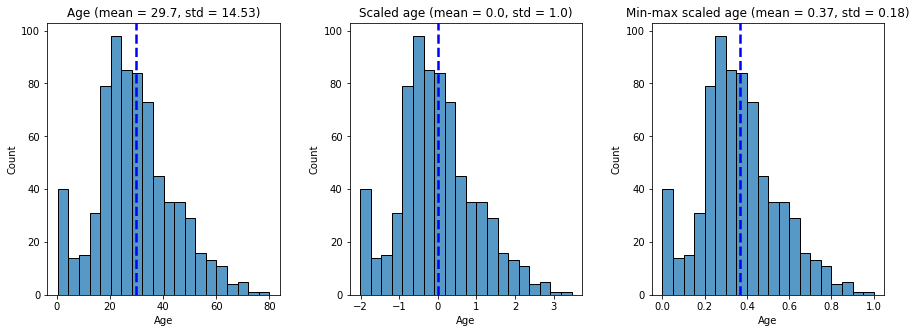

In [226]:
__fig__, __axs__ = plt.subplots(ncols=3, figsize=(15, 5))
__fig__.subplots_adjust(hspace=0.1, wspace=0.3)
__axs__[0].set(title="Age (mean = {}, std = {})".format(round(df.Age.mean(), 2), round((df.Age.var())**(1/2), 2)))
_ = sns.histplot(x=df.Age, ax=__axs__[0])
_.axvline(x=df.Age.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

scaled_age = (df.Age - df.Age.mean()) / (df.Age.var())**(1/2)
__axs__[1].set(title="Scaled age (mean = {}, std = {})".format(round(scaled_age.mean(), 2), round((scaled_age.var())**(1/2), 2)))
_ = sns.histplot(x=scaled_age, ax=__axs__[1])
_.axvline(x=scaled_age.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

minmax_scaled_age = (df.Age - df.Age.min()) / (df.Age.max() - df.Age.min())
__axs__[2].set(title="Min-max scaled age (mean = {}, std = {})".format(round(minmax_scaled_age.mean(), 2), round((minmax_scaled_age.var())**(1/2), 2)))
_ = sns.histplot(x=minmax_scaled_age, ax=__axs__[2])
_.axvline(x=minmax_scaled_age.mean(),
            color='blue',
            ls='--', 
            lw=2.5)

## Asignación 2 &#x1F625;

Calcule e imprima el skewness de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

In [227]:
def calc_skewness(x):
    return (((x - x.mean()) / (x.var() ** (1/2))) ** 3).mean()

In [228]:
skewness = calc_skewness(df.Fare)
skewness

4.771209669373592

In [229]:
df_fare_array = np.array(df.Fare.fillna(df.Fare.mean()))
df_fare_array[df_fare_array == 0] = 0.001
#fare_function = np.log(df_fare_array)
fare_function = (df_fare_array) ** (1/2)
#fare_function = (df_fare_array) ** (-1)

In [230]:
improved_skewness = calc_skewness(fare_function)
improved_skewness

2.084269758721428

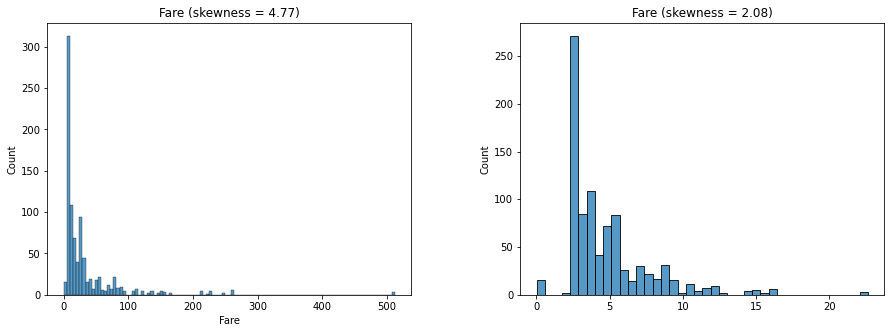

In [231]:
__fig__, __axs__ = plt.subplots(ncols=2, figsize=(15, 5))
__fig__.subplots_adjust(hspace=0.1, wspace=0.3)
__axs__[0].set(title="Fare (skewness = {})".format(round(skewness, 2)))
_ = sns.histplot(x=df.Fare, ax=__axs__[0])

__axs__[1].set(title="Fare (skewness = {})".format(round(improved_skewness, 2)))
_ = sns.histplot(x=fare_function, ax=__axs__[1])

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [232]:
sexs_encoded = pd.get_dummies(pd.Series(df["Sex"]))
#sexs_encoded.columns = ['Sex_' + c for c in list(sexs_encoded.columns.values)]
embarked_encoded = pd.get_dummies(pd.Series(df["Embarked"]))
#embarked_encoded.columns = ['Embarked_' + c for c in list(embarked_encoded.columns.values)]

In [233]:
df[['Sex_' + c for c in list(sexs_encoded.columns.values)]] = sexs_encoded
df[['Embarked_' + c for c in list(embarked_encoded.columns.values)]] = embarked_encoded

In [234]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0


## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).

https://www.askpython.com/python/examples/principal-component-analysis

https://statisticsglobe.com/biplot-pca-python

In [235]:
df_pca = df.drop(columns = ['PassengerId', 'Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'])

In [236]:
df_pca

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


### Estrategia para tratar con valores faltantes

Checamos NaNs en las columnas

In [237]:
for c in list(df_pca.columns.values):
    print(c + ' NaNs -> ' + str(df_pca[c].isnull().sum()))

Survived NaNs -> 0
Pclass NaNs -> 0
Age NaNs -> 177
SibSp NaNs -> 0
Parch NaNs -> 0
Fare NaNs -> 0
Sex_female NaNs -> 0
Sex_male NaNs -> 0
Embarked_C NaNs -> 0
Embarked_Q NaNs -> 0
Embarked_S NaNs -> 0


Obtenemos distribución de la edad y también las posiciones donde existen valores NaN en dicha columna

In [238]:
age = df_pca.Age
age_vc = age.value_counts(normalize = True)
age_values = list(age_vc.index)
age_counts = list(age_vc.values)

In [239]:
index_nan = list(df_pca.Age.index[df_pca.Age.apply(np.isnan)])

**Opción 1:** Obtenemos la distribución de la edad para imputar los valores NaNs con una muestra de tal distribución

In [240]:
#rand_sample = np.random.choice(age_values, 177, p=age_counts)

In [241]:
#df_pca.Age[index_nan] = rand_sample

**Opción 2:** Obtenemos la moda para imputar los valores NaNs

In [242]:
#pos_moda = np.argmax(age_counts)

In [243]:
#df_pca.Age[index_nan] = age_values[pos_moda]

**Opción 3:** Obtenemos la media para imputar los valores NaNs

In [244]:
df_pca.Age[index_nan] = age.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25900\1702954317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca.Age[index_nan] = age.mean()


Verificamos que ya no hay más valores NaNs

In [245]:
for c in list(df_pca.columns.values):
    print(c + ' NaNs -> ' + str(df_pca[c].isnull().sum()))

Survived NaNs -> 0
Pclass NaNs -> 0
Age NaNs -> 0
SibSp NaNs -> 0
Parch NaNs -> 0
Fare NaNs -> 0
Sex_female NaNs -> 0
Sex_male NaNs -> 0
Embarked_C NaNs -> 0
Embarked_Q NaNs -> 0
Embarked_S NaNs -> 0


### Implementación de Análisis de Componentes Principales (PCA)

Creamos la función que implementa como tal el PCA y otras funciones auxiliares

In [246]:
def scale_column(x):
    #return (x - x.mean()) / ((x.var())**(1/2))
    return (x - x.mean())

In [247]:
def scale_data(data):
    cols = data.columns.values
    for c in cols:
        column = data[c]
        sc_column = scale_column(column)
        data[c] = sc_column
    return data

Ejecutamos la función para obtener los vectores de pesos y los scores del PCA

In [248]:
df_pca_scaled = scale_data(df_pca)

In [249]:
df_pca_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.383838,0.691358,-7.699118e+00,0.476992,-0.381594,-24.954208,-0.352413,0.352413,-0.188552,-0.08642,0.277217
1,0.616162,-1.308642,8.300882e+00,0.476992,-0.381594,39.079092,0.647587,-0.647587,0.811448,-0.08642,-0.722783
2,0.616162,0.691358,-3.699118e+00,-0.523008,-0.381594,-24.279208,0.647587,-0.647587,-0.188552,-0.08642,0.277217
3,0.616162,-1.308642,5.300882e+00,0.476992,-0.381594,20.895792,0.647587,-0.647587,-0.188552,-0.08642,0.277217
4,-0.383838,0.691358,5.300882e+00,-0.523008,-0.381594,-24.154208,-0.352413,0.352413,-0.188552,-0.08642,0.277217
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.383838,-0.308642,-2.699118e+00,-0.523008,-0.381594,-19.204208,-0.352413,0.352413,-0.188552,-0.08642,0.277217
887,0.616162,-1.308642,-1.069912e+01,-0.523008,-0.381594,-2.204208,0.647587,-0.647587,-0.188552,-0.08642,0.277217
888,-0.383838,0.691358,5.684342e-14,0.476992,1.618406,-8.754208,0.647587,-0.647587,-0.188552,-0.08642,0.277217
889,0.616162,-1.308642,-3.699118e+00,-0.523008,-0.381594,-2.204208,-0.352413,0.352413,0.811448,-0.08642,-0.722783


In [250]:
def PCA(X):
    # Adaptamos la data y calculamos su matriz de covs
    X_array = X.to_numpy()
    cov_mat = np.cov(X_array.T)
    #print(cov_mat)
    
    # Calculamos los w para maximizar la varianza
    eigen_val, eigen_vec = np.linalg.eig(cov_mat)
    print(eigen_vec)
    
    # Ordenamos acorde al eigenvalue
    #eigen = [(val, vec) for val, vec in zip(eigen_val, eigen_vec)]
    #eigen.sort(key = lambda x: x[0], reverse=True)
    #eigen_vectors = np.array(list(zip(*eigen))[1])
    
    indexes = eigen_val.argsort()[::-1]
    eigen_vectors = eigen_vec[:, indexes]
    
    # Obtenemos los pca_scores
    pca_scores = X_array @ eigen_vectors
    
    return eigen_vectors, pca_scores

In [251]:
eigen_vectors, pca_scores = PCA(df_pca_scaled)

[[-2.51305439e-03  3.58120870e-03 -4.53512922e-02  4.21442479e-01
   1.65683017e-01  1.21315673e-01 -7.65205690e-02  8.77245676e-01
  -5.22063655e-02 -1.05995841e-03 -2.42196714e-15]
 [ 9.27482092e-03  1.80414861e-02  1.28036481e-01 -3.52743020e-01
  -6.06218011e-01  6.42212749e-01 -1.40978576e-01  1.79705052e-01
  -1.63276083e-01  1.43774075e-03 -1.79893411e-15]
 [-2.56932448e-02 -9.99176696e-01  2.68695845e-02  1.53281901e-04
  -9.95388331e-03  1.11726421e-02 -1.60253852e-03  5.33933518e-03
  -2.96449428e-03 -1.26527438e-04 -2.69082855e-17]
 [-3.50607172e-03  2.14077823e-02  8.92831020e-01 -1.62839736e-01
   4.04199186e-01  1.04873309e-01  1.51357507e-02  3.41986547e-02
  -9.55882181e-03  2.61689617e-05 -9.34905454e-17]
 [-3.48532148e-03  1.26196770e-02  4.13565245e-01  3.87405891e-01
  -6.55614865e-01 -4.37829571e-01  2.30218845e-01  4.25556754e-02
   4.86941065e-02  8.09996349e-04 -9.53905376e-17]
 [-9.99604812e-01  2.57092426e-02 -3.97020874e-03 -7.16375663e-03
  -5.27935713e-03  

In [252]:
eigen_vectors

array([[-2.51305439e-03,  3.58120870e-03, -4.53512922e-02,
         4.21442479e-01,  1.65683017e-01,  1.21315673e-01,
        -7.65205690e-02,  8.77245676e-01, -5.22063655e-02,
        -1.05995841e-03, -2.42196714e-15],
       [ 9.27482092e-03,  1.80414861e-02,  1.28036481e-01,
        -3.52743020e-01, -6.06218011e-01,  6.42212749e-01,
        -1.40978576e-01,  1.79705052e-01, -1.63276083e-01,
         1.43774075e-03, -1.79893411e-15],
       [-2.56932448e-02, -9.99176696e-01,  2.68695845e-02,
         1.53281901e-04, -9.95388331e-03,  1.11726421e-02,
        -1.60253852e-03,  5.33933518e-03, -2.96449428e-03,
        -1.26527438e-04, -2.69082855e-17],
       [-3.50607172e-03,  2.14077823e-02,  8.92831020e-01,
        -1.62839736e-01,  4.04199186e-01,  1.04873309e-01,
         1.51357507e-02,  3.41986547e-02, -9.55882181e-03,
         2.61689617e-05, -9.34905454e-17],
       [-3.48532148e-03,  1.26196770e-02,  4.13565245e-01,
         3.87405891e-01, -6.55614865e-01, -4.37829571e-01,
  

In [253]:
len(eigen_vectors)

11

In [254]:
pca_scores

array([[ 2.51511866e+01,  7.06517408e+00,  2.51487297e-01, ...,
        -9.94643641e-02,  2.42486720e-03, -1.04363152e-15],
       [-3.92960802e+01, -7.30086236e+00,  1.32021152e-01, ...,
        -2.46453240e-01, -7.01884496e-03,  2.39349266e-15],
       [ 2.43711788e+01,  3.07559903e+00, -4.66545366e-01, ...,
        -2.29043115e-01, -2.23332793e-03, -1.83208680e-16],
       ...,
       [ 8.74930811e+00, -1.78271198e-01,  1.33652370e+00, ...,
        -1.00125339e-01, -9.85262768e-05,  1.59314816e-15],
       [ 2.28622468e+00,  3.59888326e+00, -1.03469277e+00, ...,
        -1.25849760e-01, -2.19058393e-03,  1.45291033e-16],
       [ 2.43971191e+01, -2.93547247e+00, -4.35452671e-01, ...,
         9.06616016e-01, -3.43810333e-03, -4.56981314e-16]])

Creamos función para graficar Biplot que nos permita entender los resultados del PCA

In [255]:
def biplot(scores, vectors, labels=None):
    xs = scores[:, 0]
    ys = scores[:, 1]
    n = vectors[0].shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    #scalex = 1
    #scaley = 1
    plt.figure(figsize=(10, 10))
    plt.title('Biplot of PCA')
    plt.scatter(xs * scalex, ys * scaley, s = 2, color='cyan')
    
    for i in range(n):
        plt.arrow(0, 0, vectors[0][i], vectors[1][i], color = 'darkblue', alpha = 0.5)
        plt.text(vectors[0][i]* 1.05, vectors[1][i] * 1.05, labels[i], color = 'darkblue', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
    plt.figure()

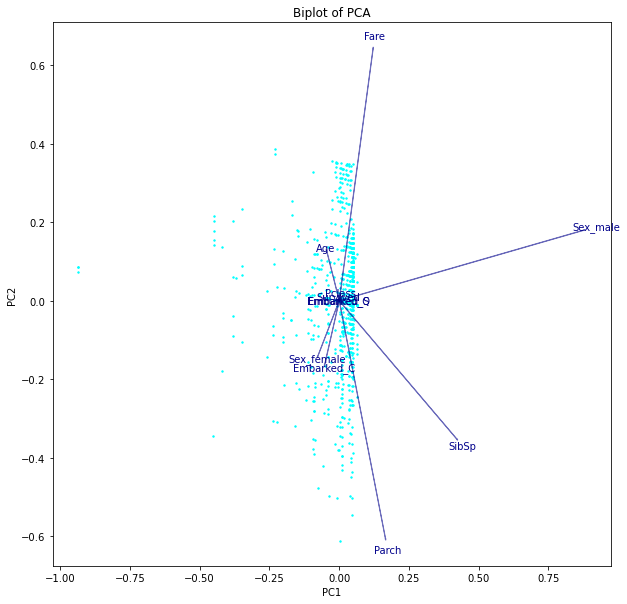

<Figure size 432x288 with 0 Axes>

In [256]:
biplot(pca_scores, eigen_vectors, df_pca.columns.values)